# Simple Neural Network in PyTorch

-----
This notebook will demonstrate how to implement and train a simple neural network in PyTorch

This simple neural network, as shown below, predicts whether or not a drug dose will be effective.

<img src='images/optimized.png' style='width: 720px'>

The training data (below) that the neural network is fit to consist of three data points for three different drug doses. Low (**0**) and high(**1**) doses do not cure a disease, so their y-axis values are both **0**. However, when the dose is **0.5**, that dose can cure the disease, and the corresponding y-axis value is **1**.

<img src='images/training_data_500x275.png' style='width: 250px;'>

Below we can see the output of the neural network for different doses, and it fits the data very well.

<img src='images/training_data_with_bent_shape_500x275.png' style='width: 250px'>

-----

## Import the required modules

In [307]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

-----

## Build a Simple Neural Network in PyTorch
Building a neural network in **PyTorch** means creating a new class with two methods: `__init__()` and `forward()`. The `__init__()` method defines and initializes all of the parameters tha we want to use, and the `forward()` method tells **PyTorch** what should happen during a forward pass through the neural network.

In [454]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.70), requires_grad=False)

        self.bfinal = nn.Parameter(torch.tensor(20.), requires_grad=False)
    
    def forward(self, X):

        X_to_top_relu = X * self.w00 + self.b00
        top_relu_output = F.relu(X_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        X_to_bottom_relu = X * self.w10 + self.b10
        bottom_relu_output = F.relu(X_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = (
            scaled_top_relu_output + scaled_bottom_relu_output + self.bfinal
        )

        output = F.relu(input_to_final_relu)

        return output


Once we have created the class that defines the neural network, we can create an actual neural network and print out its parameters.

In [455]:
model = BasicNN()

print('Paramaters before optimization')
for name, parameter in model.named_parameters():
    print(f'{name} : {parameter.data}')

Paramaters before optimization
w00 : 1.7000000476837158
b00 : -0.8500000238418579
w01 : -40.79999923706055
w10 : 12.600000381469727
b10 : 0.0
w11 : 2.700000047683716
bfinal : 20.0


## Use the Neural Network and Graph the Output
Now that we have a neural network, we can use it on a variety of doses to determine which will be effective. Then we can make a graph of these data, and this graph should match the green bent shape fit to the training data that's shown at the top of this notebook.

In [456]:
input_dosage = torch.linspace(start=0, end=1, steps=11)
input_dosage

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Now that we have `input_doses`, we can run them through the neural netwok and graph the output.

Text(0.5, 0, 'Dosage')

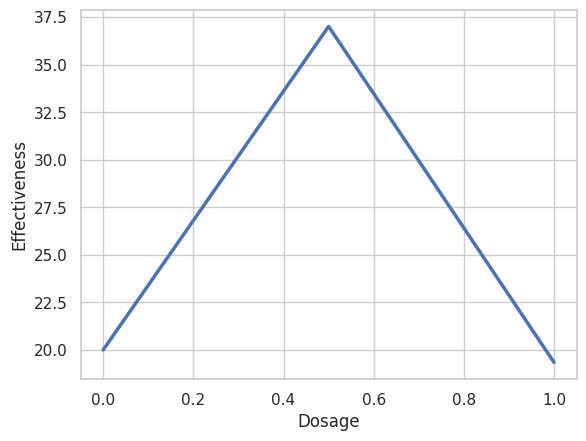

In [457]:
output = model(input_dosage)

sns.set_theme(style='whitegrid')
sns.lineplot(x=input_dosage,
             y=output.detach(),
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dosage')

The graph shows that when the dose is **0.5**, the effectiveness is 36.25, which is wrong, since the output value should be **1**. In other words, so far, our neural network does not fit the data we have provided.

-----

## Optimize (Train) a Parameter in the Neural Network and Graph the Output

In this case, we want to train our neural network. The first thing we need to do is tell **PyTorch** which parameter (or parameters) we want to trai, and we do that by setting `model.bfinal.requires_grad_(True)`. In this example, we'll train `bfinal`.

In [458]:
model.bfinal.requires_grad_(True)

Parameter containing:
tensor(20., requires_grad=True)

So, now that we have a parameter we can optimize, let's create some training data that we can use to optimize it.

In [459]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

...we can now use that training data to train (or optimize) `bfinal`.

In [460]:
optimizer = SGD(model.parameters(), lr=0.1)

for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)

        loss = (label_i - output_i)**2

        loss.backward()

        total_loss += float(loss)
    
    if (total_loss < 0.0001):
        print('Num steps: ' + str(epoch))
        print('Total loss: ' + str(total_loss))
        break

    optimizer.step()
    optimizer.zero_grad()

    print('Step: ' + str(epoch) + ' Loss: ' + str(total_loss) + '\n')

print('Paramaters after optimization')
for name, parameter in model.named_parameters():
    print(f'{name} : {parameter.data}')

Step: 0 Loss: 2070.755828857422

Step: 1 Loss: 481.0213222503662

Step: 2 Loss: 222.36773681640625

Step: 3 Loss: 142.3153533935547

Step: 4 Loss: 91.0818099975586

Step: 5 Loss: 58.292354583740234

Step: 6 Loss: 37.30710220336914

Step: 7 Loss: 23.876543045043945

Step: 8 Loss: 15.280984878540039

Step: 9 Loss: 9.779828071594238

Step: 10 Loss: 6.259091854095459

Step: 11 Loss: 4.005819320678711

Step: 12 Loss: 2.563725709915161

Step: 13 Loss: 1.6407854557037354

Step: 14 Loss: 1.0501022338867188

Step: 15 Loss: 0.6720648407936096

Step: 16 Loss: 0.4301210045814514

Step: 17 Loss: 0.2752772271633148

Step: 18 Loss: 0.17617742717266083

Step: 19 Loss: 0.11275342851877213

Step: 20 Loss: 0.07216209173202515

Step: 21 Loss: 0.04618365690112114

Step: 22 Loss: 0.02955740876495838

Step: 23 Loss: 0.018916688859462738

Step: 24 Loss: 0.012106639333069324

Step: 25 Loss: 0.007748248986899853

Step: 26 Loss: 0.004958879202604294

Step: 27 Loss: 0.00317368283867836

Step: 28 Loss: 0.002031191

The values for each weight and bias in `BasicNN` match the values we see in the neural network (below).

<img src='images/optimized.png' style='width:640px'>

So, if everything worked correctly, the optimizer should have converged on `bfinal = -16.000` after 34 steps, or epochs.

Lastly, let's graph the output from the optimized neural network and see if it's the same as what we expect. If so, then the optimization worked.

Text(0.5, 0, 'Dosage')

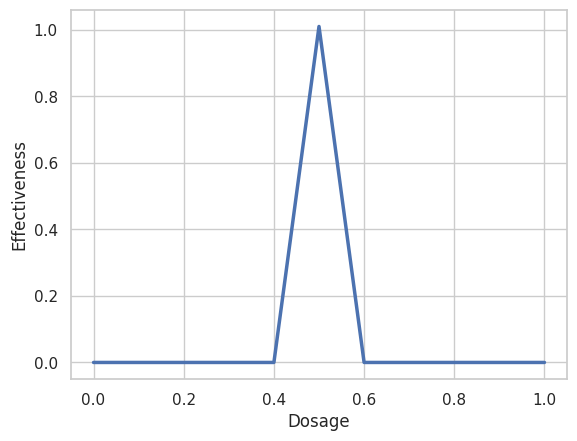

In [461]:
output_trained = model(input_dosage)

sns.set_theme(style='whitegrid')
sns.lineplot(x=input_dosage,
             y=output_trained.detach(),
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dosage')